In [1]:
import glob
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set_theme(style='darkgrid')

In [4]:
NUM_CLASSES = 22

In [5]:
DATA_DIR = './data'
MODEL_DIR = './models_by_features'
RESULT_DIR = './results_by_features'

In [6]:
list_result_files = glob.glob(os.path.join(RESULT_DIR, 'test_seed_*.csv'))

In [7]:
list_df = []
for f in list_result_files:
    file_name_split = os.path.basename(f).split('.')[0].split('_')
    seed = int(file_name_split[2])
    labels_per_class = int(file_name_split[4])
    num_features = int(file_name_split[6])
    df_temp = pd.read_csv(f)
    df_temp['Seed'] = seed
    df_temp['LabelsPerClass'] = labels_per_class
    df_temp['LabelsTotal'] = labels_per_class * NUM_CLASSES
    df_temp['NumFeatures'] = num_features
    list_df.append(df_temp)
df = pd.concat(list_df, axis=0, ignore_index=True)
df

,Model,Accuracy,Precision,Recall,F1,LogLoss,AUC,Seed,LabelsPerClass,LabelsTotal,NumFeatures
0,SSGMM_DIAG,0.354545,0.289739,0.354545,0.296059,1.634434,0.901764,7,72,1584,1
1,SSGMM_FULL,0.354545,0.289739,0.354545,0.296059,1.634434,0.901764,7,72,1584,1
2,SSGMM_TUNE,0.354545,0.289739,0.354545,0.296059,1.634434,0.901764,7,72,1584,1
3,SSGMM_DIAG,0.997727,0.997835,0.997727,0.997726,0.014404,0.999973,0,7,154,7
4,SSGMM_FULL,0.993182,0.993170,0.993182,0.993122,0.019650,0.999930,0,7,154,7
...,...,...,...,...,...,...,...,...,...,...,...
3355,SSGMM_FULL,0.995455,0.995868,0.995455,0.995443,0.017179,0.999924,8,6,132,7
3356,SSGMM_TUNE,0.995455,0.995868,0.995455,0.995443,0.017179,0.999924,8,6,132,7
3357,SSGMM_DIAG,0.918182,0.922772,0.918182,0.908657,0.319954,0.995568,5,3,66,3
3358,SSGMM_FULL,0.902273,0.882581,0.902273,0.887650,1.565195,0.986710,5,3,66,3


In [8]:
df_tuned = df[df['Model'] == 'SSGMM_TUNE'].drop(columns=['Model'])
df_tuned

,Accuracy,Precision,Recall,F1,LogLoss,AUC,Seed,LabelsPerClass,LabelsTotal,NumFeatures
2,0.354545,0.289739,0.354545,0.296059,1.634434,0.901764,7,72,1584,1
5,0.997727,0.997835,0.997727,0.997726,0.014404,0.999973,0,7,154,7
8,0.990909,0.991539,0.990909,0.990895,0.028790,0.999940,4,3,66,6
11,0.756818,0.769265,0.756818,0.750677,0.861364,0.987668,5,6,132,2
14,0.584091,0.550639,0.584091,0.540571,7.082219,0.935915,6,2,44,2
...,...,...,...,...,...,...,...,...,...,...
3347,0.356818,0.300770,0.356818,0.296991,1.624940,0.901445,2,36,792,1
3350,0.965909,0.966752,0.965909,0.965867,0.074191,0.999481,7,58,1276,4
3353,0.995455,0.995671,0.995455,0.995452,0.015321,0.999989,3,7,154,6
3356,0.995455,0.995868,0.995455,0.995443,0.017179,0.999924,8,6,132,7


In [9]:
df_grouped = df_tuned.groupby(['NumFeatures', 'LabelsPerClass']).agg(['mean', 'std'])
df_grouped

Accuracy           Precision              Recall  \
                                mean       std      mean       std      mean   
NumFeatures LabelsPerClass                                                     
1           1               0.259091  0.023202  0.272031  0.029525  0.259091   
            2               0.305909  0.027277  0.273407  0.040401  0.305909   
            3               0.327727  0.022646  0.267300  0.024339  0.327727   
            4               0.326818  0.021395  0.255722  0.024086  0.326818   
            5               0.336591  0.022864  0.259964  0.025455  0.336591   
...                              ...       ...       ...       ...       ...   
7           43              0.995682  0.002501  0.995943  0.002407  0.995682   
            50              0.995455  0.002396  0.995727  0.002313  0.995455   
            58              0.995455  0.003214  0.995684  0.003121  0.995455   
            65              0.995682  0.002924  0.995901  0.002830  0.995682   
            72              0.995682  0.002924  0.995901  0.002830  0.995682   

                                            F1              LogLoss            \
                                 std      mean       std       mean       std   
NumFeatures LabelsPerClass                                                      
1           1               0.023202  0.239524  0.020478  13.293851  1.130222   
            2               0.027277  0.261116  0.024096   6.100059  1.493274   
            3               0.022646  0.274610  0.023363   3.055981  0.643042   
            4               0.021395  0.267211  0.017998   2.378632  0.728031   
            5               0.022864  0.272609  0.017849   2.132487  0.526264   
...                              ...       ...       ...        ...       ...   
7           43              0.002501  0.995676  0.002504   0.014351  0.003073   
            50              0.002396  0.995448  0.002398   0.014343  0.003055   
            58              0.003214  0.995449  0.003217   0.014403  0.003271   
            65              0.002924  0.995677  0.002927   0.014283  0.003074   
            72              0.002924  0.995677  0.002927   0.014246  0.003030   

                                 AUC           Seed          LabelsTotal       
                                mean       std mean      std        mean  std  
NumFeatures LabelsPerClass                                                     
1           1               0.848876  0.014544  4.5  3.02765        22.0  0.0  
            2               0.875487  0.010497  4.5  3.02765        44.0  0.0  
            3               0.884344  0.008382  4.5  3.02765        66.0  0.0  
            4               0.888699  0.009263  4.5  3.02765        88.0  0.0  
            5               0.892028  0.007103  4.5  3.02765       110.0  0.0  
...                              ...       ...  ...      ...         ...  ...  
7           43              0.999969  0.000027  4.5  3.02765       946.0  0.0  
            50              0.999969  0.000027  4.5  3.02765      1100.0  0.0  
            58              0.999973  0.000022  4.5  3.02765      1276.0  0.0  
            65              0.999973  0.000021  4.5  3.02765      1430.0  0.0  
            72              0.999973  0.000021  4.5  3.02765      1584.0  0.0  

[112 rows x 16 columns]

In [10]:
df_grouped[df_grouped.index.get_level_values('NumFeatures') == 7][['Accuracy', 'F1', 'AUC']]

Accuracy                  F1                 AUC  \
                                mean       std      mean       std      mean   
NumFeatures LabelsPerClass                                                     
7           1               0.951591  0.060236  0.946751  0.066087  0.994853   
            2               0.979091  0.027100  0.977115  0.030729  0.999232   
            3               0.995455  0.001515  0.995449  0.001517  0.999971   
            4               0.995455  0.001515  0.995449  0.001517  0.999971   
            5               0.995455  0.001515  0.995449  0.001517  0.999971   
            6               0.995455  0.001515  0.995449  0.001517  0.999971   
            7               0.995227  0.001990  0.995221  0.001992  0.999972   
            14              0.995455  0.001515  0.995449  0.001517  0.999971   
            22              0.995682  0.001990  0.995676  0.001992  0.999971   
            29              0.995227  0.002260  0.995221  0.002262  0.999969   
            36              0.995682  0.002501  0.995676  0.002504  0.999969   
            43              0.995682  0.002501  0.995676  0.002504  0.999969   
            50              0.995455  0.002396  0.995448  0.002398  0.999969   
            58              0.995455  0.003214  0.995449  0.003217  0.999973   
            65              0.995682  0.002924  0.995677  0.002927  0.999973   
            72              0.995682  0.002924  0.995677  0.002927  0.999973   

                                      
                                 std  
NumFeatures LabelsPerClass            
7           1               0.007474  
            2               0.001539  
            3               0.000027  
            4               0.000027  
            5               0.000027  
            6               0.000027  
            7               0.000026  
            14              0.000028  
            22              0.000029  
            29              0.000029  
            36              0.000027  
            43              0.000027  
            50              0.000027  
            58              0.000022  
            65              0.000021  
            72              0.000021

In [11]:
from matplotlib.ticker import FuncFormatter

def to_percentage(y, pos):
    return f"{y * 100:.0f}"

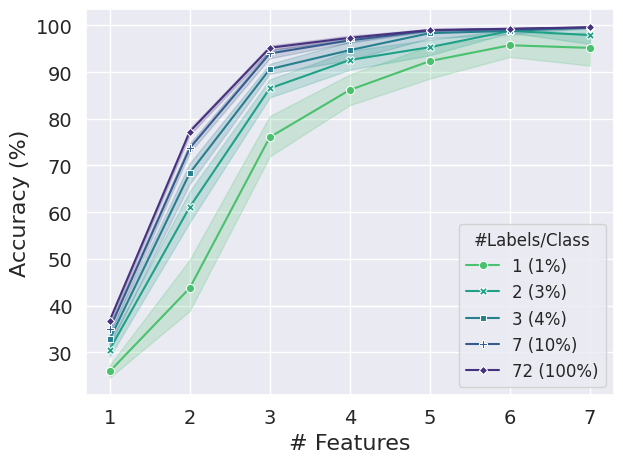

In [12]:
num_labels_considered = [1, 2, 3, 7, 72]
sequential_colors = sns.color_palette(sns.color_palette("viridis_r", len(num_labels_considered) + 1)[1:])
df_sub = df_tuned[df_tuned['LabelsPerClass'].isin(num_labels_considered)]
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8))
sns.lineplot(df_sub, x='NumFeatures', y='Accuracy', hue='LabelsPerClass', hue_order=np.sort(df_sub['LabelsPerClass'].unique()), style='LabelsPerClass', palette=sequential_colors, markers=True, dashes=False, ax=ax)
ax.set_xlabel('# Features', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))
ax.set_ylabel('Accuracy (%)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["1 (1%)", "2 (3%)", "3 (4%)", "7 (10%)", "72 (100%)"], title="#Labels/Class", loc='lower right', fontsize=12)
fig.tight_layout()